In [25]:
import pandas as pd
import numpy as np
import acquire as a
import new_lib as nl
import prepare as p
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
wine = a.acquire_wine()
wine = p.prepare_wine(wine)
wine

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,0,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,0,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,0,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
train, val, test, X_train, y_train, X_val, y_val, X_test, y_test = nl.train_vailidate_test_split(wine, 'quality')

In [4]:
train_scaled, val_scaled, test_scaled = nl.scale_splits(X_train, X_val, X_test, MinMaxScaler(), columns = ['fixed_acidity', 'volatile_acidity'])

In [5]:
train

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol,quality
3899,0,7.3,0.30,0.33,2.3,0.043,28.0,125.0,0.99084,3.34,0.44,12.6,7
5268,0,5.9,0.37,0.32,1.6,0.029,41.0,102.0,0.98916,3.41,0.55,12.7,7
332,1,8.0,0.58,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4,6
274,1,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5
4326,0,6.5,0.17,0.31,1.5,0.041,34.0,121.0,0.99092,3.06,0.46,10.5,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,7.0,0.15,0.34,1.4,0.039,21.0,177.0,0.99270,3.32,0.62,10.8,5
2129,0,6.4,0.10,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.7,6
5437,0,6.5,0.41,0.22,4.8,0.052,49.0,142.0,0.99460,3.14,0.62,9.2,5
481,1,9.4,0.30,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7,8


In [6]:
train_scaled

,red_or_white,fixed_acidity,volatile_acidity,citric_acid,sugar,chlorides,free_sulfer,total_sulfer,density,pH,sulphates,alcohol
3899,0,0.264957,0.146667,0.33,2.3,0.043,28.0,125.0,0.99084,3.34,0.44,12.6
5268,0,0.145299,0.193333,0.32,1.6,0.029,41.0,102.0,0.98916,3.41,0.55,12.7
332,1,0.324786,0.333333,0.28,3.2,0.066,21.0,114.0,0.99730,3.22,0.54,9.4
274,1,0.282051,0.380000,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
4326,0,0.196581,0.060000,0.31,1.5,0.041,34.0,121.0,0.99092,3.06,0.46,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...
2916,0,0.239316,0.046667,0.34,1.4,0.039,21.0,177.0,0.99270,3.32,0.62,10.8
2129,0,0.188034,0.013333,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.7
5437,0,0.196581,0.220000,0.22,4.8,0.052,49.0,142.0,0.99460,3.14,0.62,9.2
481,1,0.444444,0.146667,0.56,2.8,0.080,6.0,17.0,0.99640,3.15,0.92,11.7


In [7]:
def visual_correlations(df):
    '''
    This function creates a heatmap of the features
    '''
    import matplotlib.pyplot as plt
    import seaborn as sns
    count_var = ['red_or_white', 'fixed_acidity', 'volatile_acidity', 'citric_acid', 'sugar', 'chlorides', 'free_sulfer', 'total_sulfer', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

    train_corr = df[count_var].corr()
    
    plt.title('Strength of correlation with quality')
    
    return sns.heatmap(train_corr, annot=True, annot_kws={"size": 7}, linewidths=2, linecolor='yellow')

<AxesSubplot:title={'center':'Strength of correlation with quality'}>

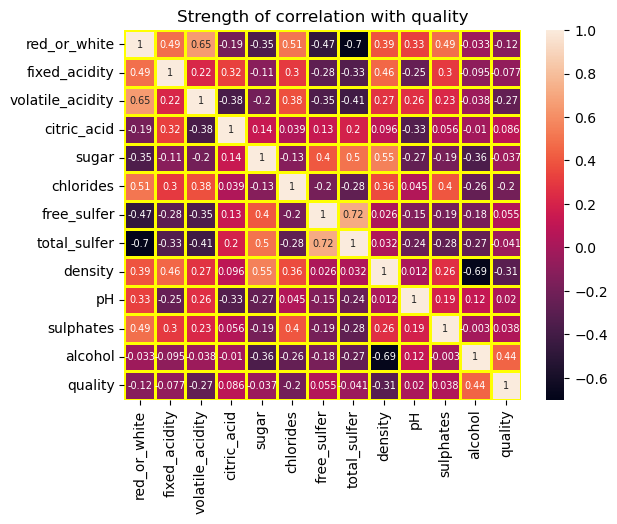

In [8]:
hm_visual = visual_correlations(wine)
hm_visual

In [9]:
def rfe(X, y, n):
    '''
    This function takes in the features, target variable 
    and number of top features desired and returns a dataframe with
    the features ranked
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.feature_selection import SelectKBest, f_regression, RFE
    lm = LinearRegression()
    rfe = RFE(lm, n_features_to_select=n)
    rfe.fit(X, y)
    ranks = rfe.ranking_
    columns = X.columns.tolist()
    feature_ranks = pd.DataFrame({'ranking': ranks, 'feature': columns})
    return feature_ranks.sort_values('ranking')

In [10]:
# Feture engineering usings RFE to confirm best features.
feature_ranks = rfe(X_train, y_train, 4)
feature_ranks

,ranking,feature
2,1,volatile_acidity
5,1,chlorides
8,1,density
10,1,sulphates
11,2,alcohol
0,3,red_or_white
1,4,fixed_acidity
9,5,pH
4,6,sugar
3,7,citric_acid


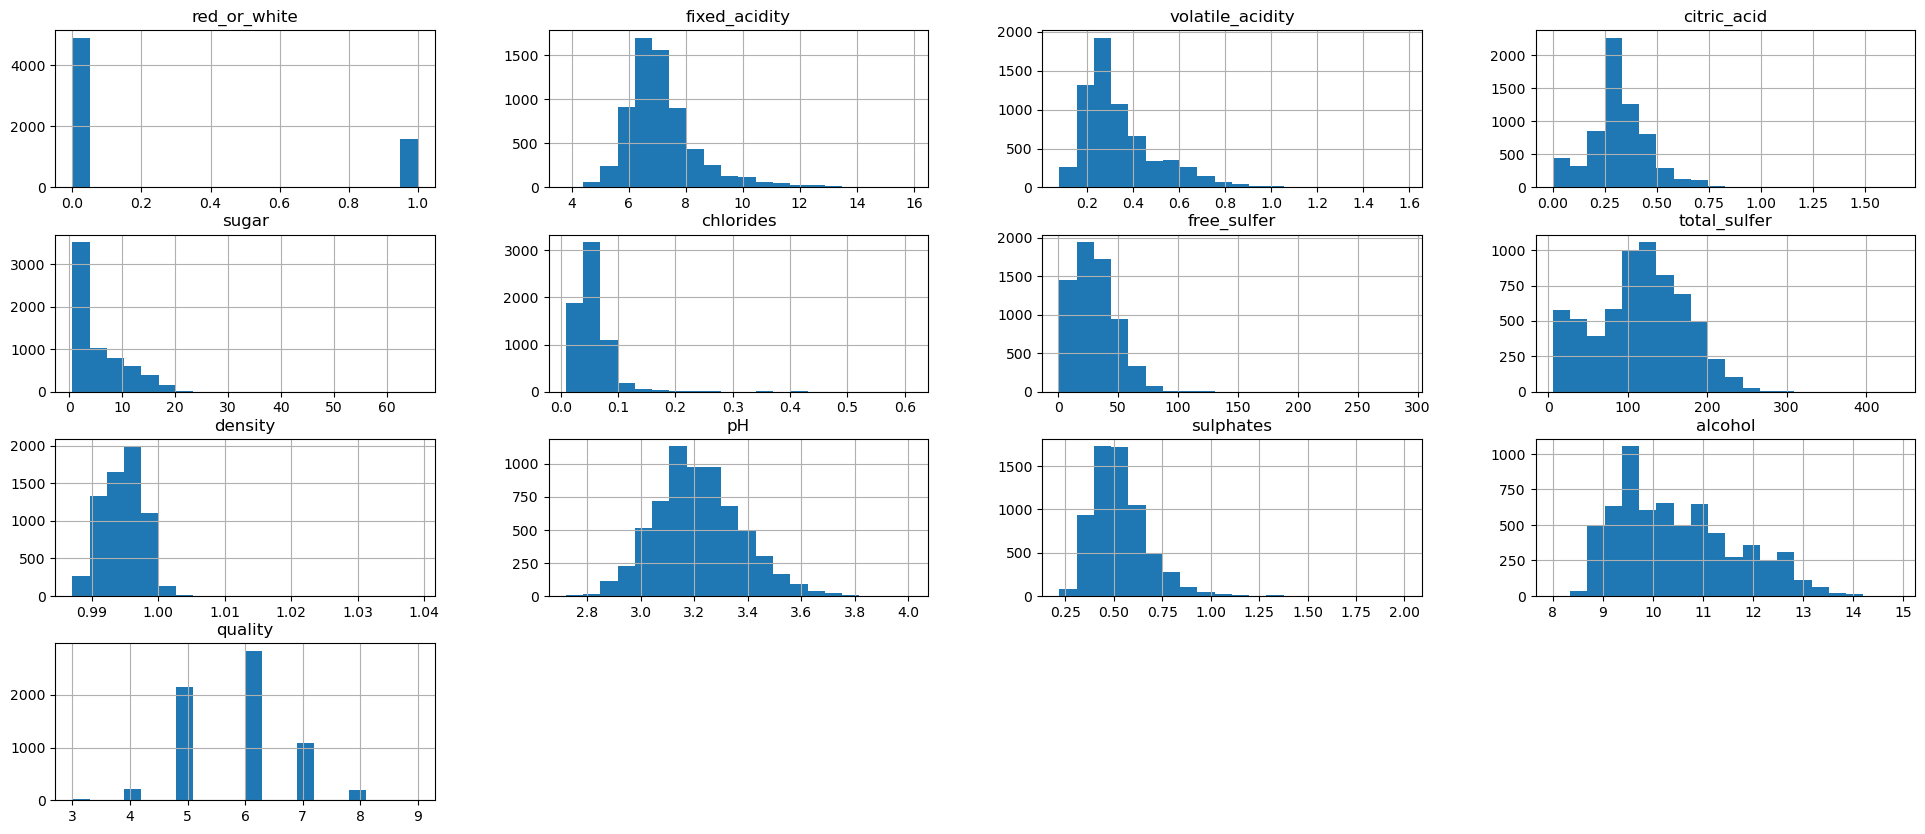

In [11]:
wine.hist(figsize=(24, 10), bins=20)
plt.show()

In [38]:
good_red = wine[wine.red_or_white == 1]
good_red = good_red[good_red.quality >= 7 ]
good_red.red_or_white.count()/len(wine[wine.red_or_white == 1])

0.1357098186366479

In [39]:
good_white = wine[wine.red_or_white == 0]
good_white = good_white[good_white.quality >= 7 ]
good_white.red_or_white.count()/len(wine[wine.red_or_white == 0])

0.21641486320947326

In [13]:
wine[wine.quality == 4].count()

red_or_white        216
fixed_acidity       216
volatile_acidity    216
citric_acid         216
sugar               216
chlorides           216
free_sulfer         216
total_sulfer        216
density             216
pH                  216
sulphates           216
alcohol             216
quality             216
dtype: int64

In [27]:
X = train[['volatile_acidity', 'chlorides']]


In [28]:
seed = 123

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X)

array([1, 0, 2, ..., 0, 1, 1], dtype=int32)

In [29]:
train['cluster'] = kmeans.predict(X)


In [30]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_12707/2842572673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['unscaled_clusters'] = kmeans.predict(X)


,volatile_acidity,chlorides,unscaled_clusters
3899,0.30,0.043,1
5268,0.37,0.029,0
332,0.58,0.066,2
274,0.65,0.088,2
4326,0.17,0.041,1


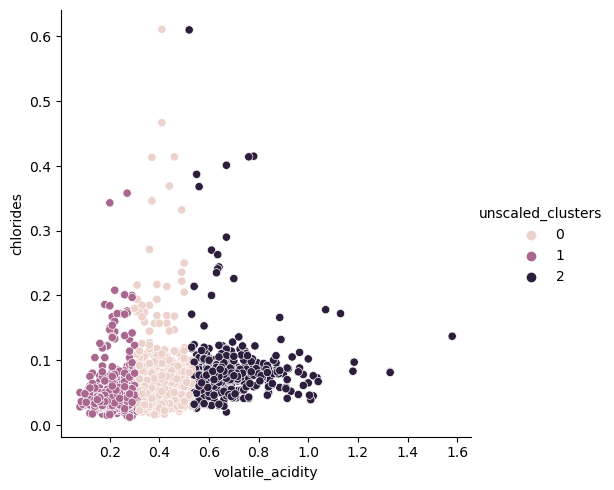

In [31]:
sns.relplot(data=X, x='volatile_acidity', y='chlorides', hue='unscaled_clusters')
plt.show()

In [32]:
mm_scaler = MinMaxScaler()

X[['volatile_acidity', 'chlorides']] = mm_scaler.fit_transform(X[['volatile_acidity', 'chlorides']])

X.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_12707/3311677972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['volatile_acidity', 'chlorides']] = mm_scaler.fit_transform(X[['volatile_acidity', 'chlorides']])


,volatile_acidity,chlorides,unscaled_clusters
3899,0.146667,0.051753,1
5268,0.193333,0.028381,0
332,0.333333,0.090150,2
274,0.380000,0.126878,2
4326,0.060000,0.048414,1


In [33]:
kmeans_scale = KMeans(n_clusters=3, random_state=seed)

kmeans_scale.fit(X[['volatile_acidity', 'chlorides']])

KMeans(n_clusters=3, random_state=123)

In [34]:
kmeans_scale.predict(X[['volatile_acidity', 'chlorides']])

array([1, 0, 2, ..., 0, 0, 1], dtype=int32)

In [35]:
X['scaled_clusters'] = kmeans_scale.predict(X[['volatile_acidity', 'chlorides']])

X.head()

/var/folders/2g/_40bymd11_x47n42bls8ypmr0000gn/T/ipykernel_12707/2162246327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['scaled_clusters'] = kmeans_scale.predict(X[['volatile_acidity', 'chlorides']])


,volatile_acidity,chlorides,unscaled_clusters,scaled_clusters
3899,0.146667,0.051753,1,1
5268,0.193333,0.028381,0,0
332,0.333333,0.090150,2,2
274,0.380000,0.126878,2,2
4326,0.060000,0.048414,1,1


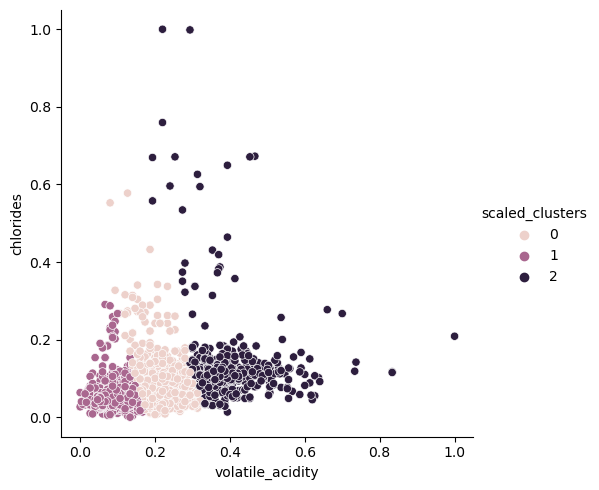

In [36]:
sns.relplot(data=X, x='volatile_acidity', y='chlorides', hue='scaled_clusters')
plt.show()

1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.

2. Does the quality differ between red or white wine?

3. Is there a relationship between quality and volatile acidity? (Linear or otherwise).

4. Is there a relationship between chlorides and quality? (Linear or otherwise).

5. If we control for good or bad wine, does quality differ across density?

***1. What is the distribution of each of the variables? This is important as we move forward into testing and modeling.***

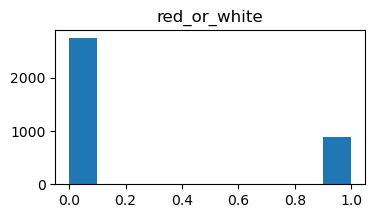

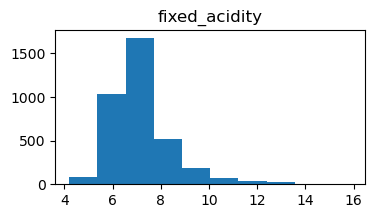

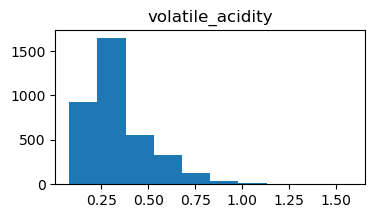

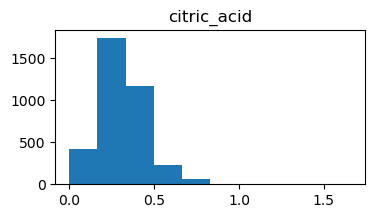

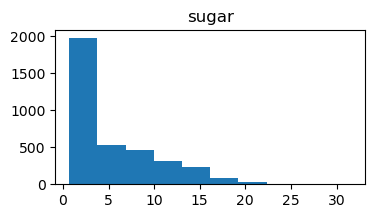

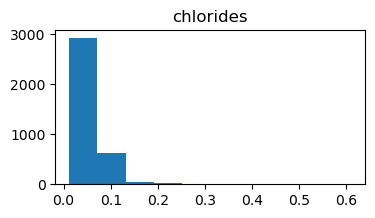

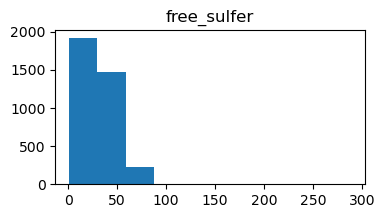

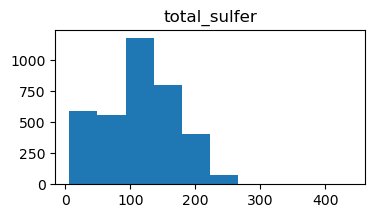

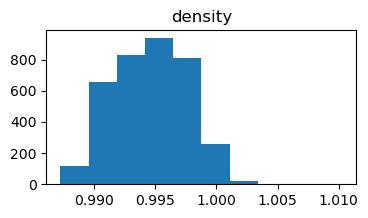

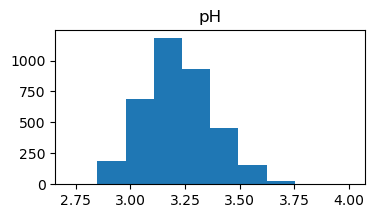

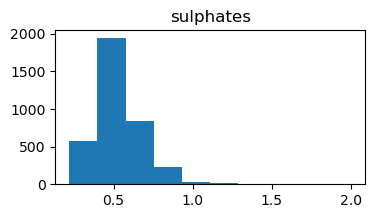

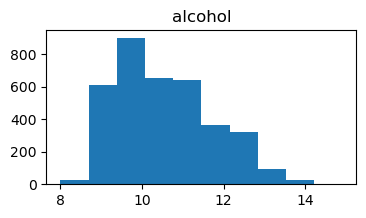

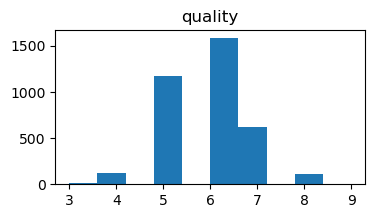

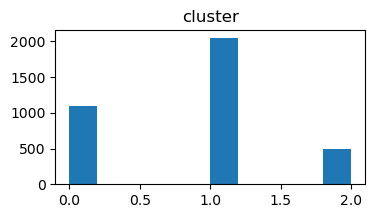

In [37]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()